In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly_express as px
import math

import numpy as np

import altair as alt
from vega_datasets import data

In [8]:
wta2016df= pd.read_csv('../data/clean/wtafinalversion2016.csv')
sample16=pd.read_csv('../data/clean/sample2016.csv')

demo16= pd.read_csv('../data/clean/demo2016.csv')
matchstat16= pd.read_csv('../data/clean/matchstatistics2016.csv')
ranking16= pd.read_csv('../data/clean/wtarankings2016.csv')

clay16= pd.read_csv('../data/clean/clay2016.csv')
hard16= pd.read_csv('../data/clean/hard2016.csv')
grass16= pd.read_csv('../data/clean/grass2016.csv')


straightsets16= pd.read_csv('../data/clean/2setmatches2016.csv')
threesets16= pd.read_csv('../data/clean/3setmatches2016.csv')

svitolina2016= pd.read_csv('../data/clean/svitolina2016.csv')
w_svitolina= pd.read_csv('../data/clean/w_svitolina.csv')
l_svitolina= pd.read_csv('../data/clean/l_svitolina.csv')

kvitova2016= pd.read_csv('../data/clean/kvitova2016.csv')
w_kvitova= pd.read_csv('../data/clean/w_kvitova.csv')
l_kvitova= pd.read_csv('../data/clean/l_kvitova.csv')

dominguezlino2016= pd.read_csv('../data/clean/dominguezlino2016.csv')
w_dominguezlino= pd.read_csv('../data/clean/w_dominguezlino.csv')
l_dominguezlino= pd.read_csv('../data/clean/l_dominguezlino.csv')

# Analyzing the 2016 WTA Tennis Season
## _Identifying Key Variables to predict Outcomes in Women's Tennis_
### by Moses Nsereko

![Simona Halep and former coach Wim Fisette review data metrics during a practice session](CRTaJipUsAEkSeQ.jpg)

## Introduction

As the tennis season turns to a new decade, one can look back on the 2010s as a period correlating with growth of data journalism. In 2013, the WTA partnered with software firm SAP to bring a heightened level of data analytics to coaching. Select coaches were permitted to bring SAP tablets on court to use on-going match statistics in coaching sessions. While this data is frequently used among players and coaching teams, the relevance of these metrics to the tennis punditry is yet to be seen. Pundits often commentate on women's matches differently than the men's counterpart. While pundits allude that men's tennis places higher emphasis on serving, they suggest women's tennis centers around return games and minimizing unforced errors. 

Across both sports, analysts allude that an athletes physical prowess greatly predicts their success. A tennis player's height, age, handedness, and other physical traits are often mentioned during pre-match analysis. Lastly, the same tennis match-up is treated differently depending on what surface it is played on. Even as court surfaces become more uniform, there have been a number of surface specialists that are recognized in the women's tennis discourse. In the 2010s, Sabine Lisicki was a known grass-court specialist, while Sara Errani began her career as a clay court specialists. However, the question remains whether court surface alters the predictability of a match in women's tennis.

But when it comes to predicting player success in a given match, what types of data matter?

With in match statistics, players' physical traits, and court surface all being considered variables to match outcome, this article will analyze how these three variable types translate into trends that can be used in women's tennis discourse to predict the likelihood that a certain player will win or lose any given match. By normalizing these trends, the women's tennis discourse can become more streamlined and can avoid superfluous variables when analyzing outcomes in women's tennis. 

## Generalized Player Analysis
### Method

This article attempts to determine whether uniform variables can be used to predict the outcome of women's tennis matches.This analysis was specifically conducted during the 2016 tennis season, using a data set from Data World. This data set contains match results for the 2016 season across Grand Slam, Premier, and International level women's tournaments.

In [7]:
wta2016df.shape

(2900, 52)

The original data set has 2900 matches and 52 match statistics. From these matches, I sampled 200 matches from this data set to conduct the first level of analysis, where I conducted a series of shaded density plots to see how single variable is distribute across the match winner and loser of the course of the sample. The sample data set is included below. The density plots compared how winner's and losers compared with distributions of two key player demographics: __height__ and __age__. The second set of distributions compared winner's and losers performance on key match statistics: __aces, first serve percentage, percentage of first serves won, percentage of second serves won,__ and __percentage of break points saved__. The same distribution analysis was conducted after controlling for court surfaces and match lengths to see how the key trends would shift. The shape of the distribution and the relation of the distribution for winners and losers will determine what values were key for each of these variables.

In [17]:
sample16[['tourney_name','round','winner_name','loser_name','score']].head()

,tourney_name,round,winner_name,loser_name,score
0,Indian Wells,R64,Serena Williams,Laura Siegemund,6-2 6-1
1,Nurnberg,R32,Laura Siegemund,Marina Melnikova,6-1 6-0
2,Fed Cup WG R1: RUS vs BLR,RR,Victoria Azarenka,Darya Kasatkina,6-2 5-7 6-3
3,Shenzhen,R16,Timea Babos,Monica Niculescu,6-1 6-4
4,Moscow,QF,Daria Gavrilova,Anastasia Pavlyuchenkova,7-5 4-6 6-3


### Player Demographics
The two main player demographics this article examines concern player age and player height. The initial distribution of winners and losers across age and height, respectively, are below. If significant differences between winners and losers are cleanly sorted by player demographics, then while tennis analysts can predict match outcomes, players will be unable to make adjustments to impact these match outcomes. 
##### Age

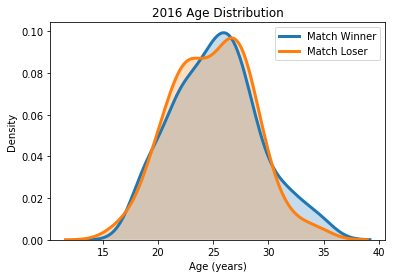

In [11]:
sns.distplot(sample16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

Both match wins and match losses are normally distributed across player age, suggesting that most players in the 2016 tennis season are around 25 years of age. Because there is little overlap, it appears that age had little impact on match outcome in 2016. 

There are two minor divergence points in the density plot; Firstly, tennis players between 20-25 are slightly more likely to be lose a match than to win won. This theme lines up with the tennis discourse. As tennis has become more physical, younger tennis players on tour have struggled to reach the immediate success that was common in the 1990s. Switching from junior tennis to a more physical senior game requires more adjustment and yields in more losses as a younger WTA player.

Conversely, tennis players between 30-35 were more likely to win matches in 2016. This can be explained not by the players who are playing from 30-35, but by the players who are no longer playing from 30-35. Unsuccessful tennis players have retired by the 30-35 age range, leaving behind only the successful players who naturally win more. Conversely to younger players, these players are well adapted to senior tour and have found enough success to finance themselves to stay in the sport.
##### Controlling for Match Length and Court Surface: Age on Grass

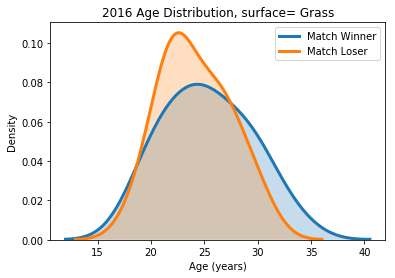

In [27]:

sns.distplot(grass16['winner_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(grass16['loser_age'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Age Distribution, surface= Grass')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()


All of the variables in both the player demographic and match statistics section were individually controlled for each of the three types of court surfaces (clay, hard, and grass), and both types of match lengths (straight set and three set matches). One of the most interesting shifts occurred when the age distribution of winners and losers was controlled for grass courts, there was a shift in the segments of the distributions that diverged.

Firstly, players younger than 25 were less likely to win matches on a grass court. As a player got closer to 30, there was more parity between whether or not they won or lost  grass court match. Lastly, once a player was around 27, she was more likely to win grass court matches.

This can be explained by the scarcity of player's grass court experience. Most commonly played in the UK, the Netherlands, and Spain, the WTA grass court season is usually only one month long. Players usually have very little time to gain match experience on the surface compared to the seven month combined clay and hard court seasons. As a result, older players are likely more experienced on grass courts and are more likely to win matches.
##### Height

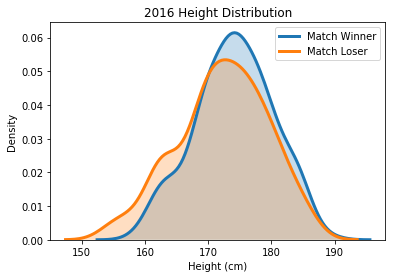

In [18]:
sns.distplot(sample16['winner_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['loser_ht'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()

Similar to the distribution by age, match wins and match losses are normally distributed across player age. This normal distribution suggests that most players in the 2016 tennis season are between 170-175. Unlike the age distribution, these two density plots have less overlap, revealing height had an impact on match outcome in 2016. This plot has two points of divergence 150-165 centimeters and 170-185 centimeters.

Tennis players that are shorter than 165 centimeters are more likely to lose matches. Matching the data results to the data results, we see that a shortness can be a disadvantage in women's tennis. While shorter tennis players correlate to having more court speed, they also correlate to having slower serves and less power. This data set suggests that at 165 cm, there are diminishing marginal returns to increased court speed and a player's lacking power quotient will struggle to find success.

Conversely, tennis players taller than 170 centimeters, especially players between 170 and 185 centimeters, are more likely to win matches.This supports the notion that height leads to a higher power quotient. It is important to note that as height increases above 170 centimeters the advantage between winners and losers decreases. This is explained by the fact that the advantage of height also has diminishing marginal returns, as incremental improvement in power and serving is outweighed by an incremental decrease in court coverage.

### Match Statistics
The density plot analysis was conducted using the following match statistics: aces, first serve percentage, percentage of first serves won, percentage of second serves won, and percentage of break points saved.If significant differences between winners and losers are  sorted by in-match statistics,then  tennis players will be able to make adjustments to impact these match outcomes. As a result, tennis players will focus more on the key values for match statistics, as opposed to player demographics. While most of these stats had fairly high overlap between match winners and losers, a few in-match variables stood out in where their respective distributions diverged.
##### Aces

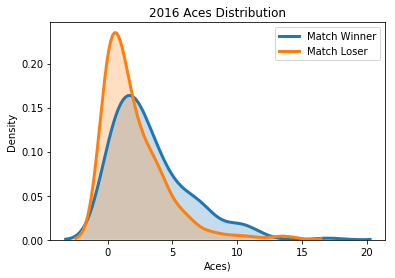

In [19]:
sns.distplot(sample16['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Aces Distribution')
plt.xlabel('Aces)')
plt.ylabel('Density')
plt.show()

The distribution of aces is right skewed, meaning that their is a positive skewness on the distribution of aces in matches in 2016. This means that most players in women's tennis did not hit many aces in 2016. Most matches likely had each player serve less than five aces. While this does not correlate to serving success, the number of aces somewhat correlates to serve speed and placement. In accordance with the tennis discourse, serve speed and placement does not matter as much to the outcome of tennis matches.

Because players that serve more than five aces are more likely to win matches, we can see that there is a relative advantage to serving more aces. However, with a density of less than five percent of the sample serving five aces, higher ace yields are not commonly observed. This proves a certain trend, serving a large number of aces is rare, but is nearly always correlated with a successful match outcome. When discussing serving aces in women's tennis, the notion is not that serve speed and placement are not beneficial, but that not possessing these skills does not consistently put you at a relative disadvantage to your opponents.
##### Percentage Break Points Saved

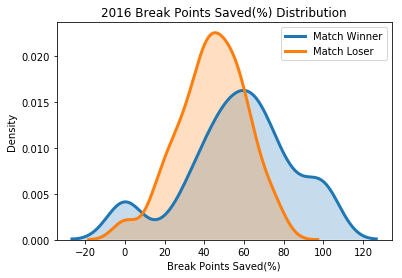

In [20]:
sns.distplot(sample16['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Break Points Saved(%) Distribution')
plt.xlabel('Break Points Saved(%)')
plt.ylabel('Density')
plt.show()

The percentage of break points saved seems distribution is the first major statistic where the distribution of the variable between winners and losers is not the same.For match losers, percent of break points saved seems normally distributed, where most players that lose a match save only about 40% of the break points that they face. 

For match winners, the distribution is triple peaked at 0%, 70%, and 100% respectively. For players that win their match, the main peak exists at 70% of break points saved. A logical assessment of the data helps explain to of these peaks. If a player has faced no break points in the match they never faced a break point. Which means that the only way for them to lose the match is to lose two tiebreak sets. Because this match scoreline is rare among the possible permutations for tennis match scores, players that never face a break point are more likely to win their match. The peak at 100% is explained the same way; just like a player who never faced a break point, a player who saved all of their break points always held their serve, and their for was way more likely to win a match based on the possible set scores available for someone who never dropped serve.

Regarding the impact on prediction outside of these two extraneous peaks, a player is equally likely to win or lose their match if they save around 60% of their break points. As the break point saved percentage increases, the likelihood of match wins also increase. Because there is no diminishing returns to increased break point saved percentage, this likelihood only increases as break point saved percentage increases. Saving break points suggests that a player can protect their serve games. As a player wins more of their serve games, they can win less of their opponents serve games in order to win a match. As a result a break point saved percentage above 60% in 2016 bodes well for the likelihood that a player wins any given match
##### Percent of First Serves Won v. Percent of Second Serves Won

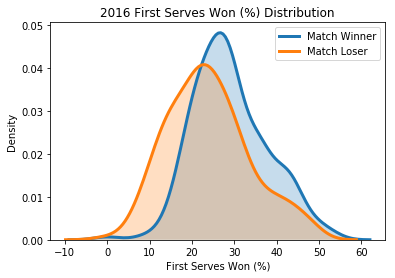

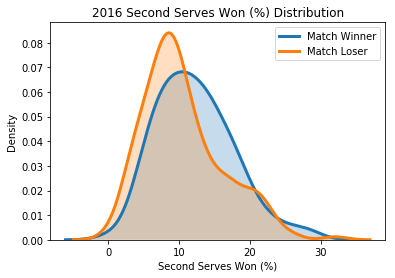

In [21]:
sns.distplot(sample16['w_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_1stWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 First Serves Won (%) Distribution')
plt.xlabel('First Serves Won (%)')
plt.ylabel('Density')
plt.show()

sns.distplot(sample16['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Winner")
sns.distplot(sample16['l_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Loser")
plt.title('2016 Second Serves Won (%) Distribution')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

While percentage of first and second serves won have similar distribution for both match winners and losers, it is the actually numbers associated with these distribution that is important to note.In both cases, there is a threshold percentage that will lead to a higher likelihood to win a given match than to lose that given match. For first serves,that percentage is considerably higher than for second serves. If a player wins more than 30% of their first serves, they are more likely to win a match. A player is also more likely to win a match if they win more than 15% of their second serve points.

This pair of density plots connects to women's tennis discourse in two ways. First, there is the fact that these threshold percentages are low. This says that players can win less than half of their service points and still have a chance to win that match. This confirms that serve games are more frequently lost than won in women' tennis, supported by the importance of having a high break point saved rate. The second notion the data supports is how second serves are usually won at lower rates than a player's first serve. This is because second serves are usually slower, to ensure a player avoids double faulting and can at least start the point. If a player serves with less spin, the slower speed will not bother the returner and have an increased chance to win the point.

## Individual Player Analysis
### Method
This article will now decipher how these metrics apply to an indivuidual player's match winning chances in 2016. This analysis was also conducted using a random sample of five names from the original __wta2016df__ data set. The sample yielded teh following five names: __Elina Svitolina, Sloane Stephens, Saisai Zheng, Petra Kvitova,__ and __Lourdes Domínguez Lino__. to avoid analyzing multiple players with similairites in age, handedness and height, only Svitolina, Kvitova, and Lourdes Dominguez Lino were chosen to be analyzed across the match statistics. Only match statisitcs were analyzed in this section, because they are the only grouping of variables deemed relevant for a coaching team. 

A sample of what the player specific data set looks like is included below:

In [32]:
svitolina2016[['tourney_name','round','winner_name','loser_name','score']].head()

,tourney_name,round,winner_name,loser_name,score
0,Sydney,R32,Angelique Kerber,Elina Svitolina,4-6 6-0 6-3
1,Australian Open,R128,Elina Svitolina,Victoria Duval,6-2 6-3
2,Australian Open,R64,Naomi Osaka,Elina Svitolina,6-4 6-4
3,Dubai,SF,Sara Errani,Elina Svitolina,6-4 6-4
4,Dubai,QF,Elina Svitolina,Coco Vandeweghe,6-4 1-6 6-2


### Elina Svitolina
![](251517.jpg)

By the 2016 end of the WTA season, ELina Svitolina, 174 centimeters tall, was 22 years old and was ranked 14th in the world. For context, her season was highlighted by a quarterfinal showing in the Olympic Games, where along the way she beat Serena Williams for the first time.

Text(0.5, 1.0, 'Wins by surface, player= Elina Svitolina')

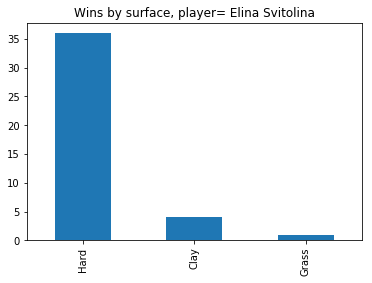

In [70]:
w_svitolina['surface'].value_counts().plot.bar()
plt.title('Wins by surface, player= Elina Svitolina')

Text(0.5, 1.0, 'Losses by surface, player= Elina Svitolina')

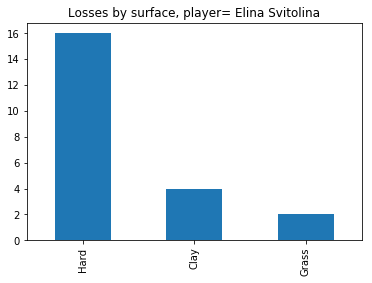

In [69]:
l_svitolina['surface'].value_counts().plot.bar()
plt.title('Losses by surface, player= Elina Svitolina')

Above are a series of graphs charting Svitolina's wins and losses by surfaces. With 36 match wins, Svitolina won most of her matches on hard court. Her winning percentage on across all three surfaces are: 69.2% for hard courts, 50% on clay courts, and 33.3% on grass courts. Svitolina was significantly more likely to win matches on hard courts and struggled during the grass court season. As a 22 year old without much experience on the grass courts, it made sense that she struggled on grass based on the evidence of the age distribution density plot.

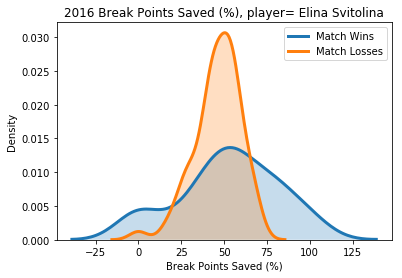

In [39]:
sns.distplot(svitolina2016['w_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(svitolina2016['l_pctbpSaved'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Break Points Saved (%), player= Elina Svitolina')
plt.xlabel('Break Points Saved (%)')
plt.ylabel('Density')
plt.show()

Regarding percentage of break points saved, Svitolina's threshold number slightly diverged from the generalized player. Where the generalized women's tennis player needed to save 60% of her break points that she faced, Svitolina needs to save 70% of the break points she faced. In most of her matches she lost that season, Svitolina was only able to save 25%-50% of the break points that she faced. This higher number of break points saved required to win a match suggests that Svitolina faces more break points because of a weaker serve than the average player. These break points may come in the same service game, or successive service games, but she must save more break points in order to protect her serve the same way the average player does.

### Petra Kvitova
![](maxresdefault.jpg)
By 2016, left-handed Petra Kvitova was the only player in this random sample to win a grand slam, winning two Wimbledon titles, in both 2011 and 2014. She ended 2016 as a 26 year old player, standing a staggering 182 centimeters tall. Her season highlight also came at the Olympics, winning the bronze medal in singles. She won the Fed Cup trophy for the Czech Republic and ended the season as the world number 11.

Text(0.5, 1.0, 'Wins by surface, player= Petra Kvitova')

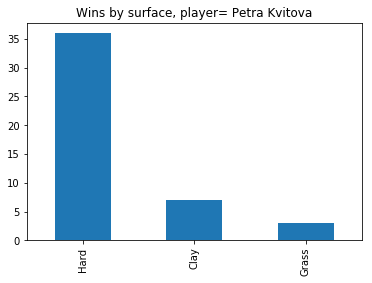

In [68]:
w_kvitova['surface'].value_counts().plot.bar()
plt.title('Wins by surface, player= Petra Kvitova')

Text(0.5, 1.0, 'Losses by surface, player= Petra Kvitova')

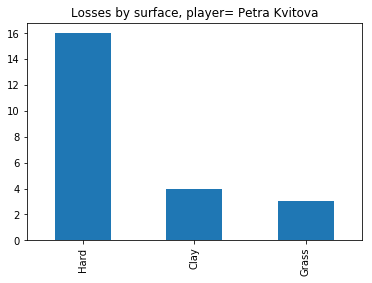

In [67]:
l_kvitova['surface'].value_counts().plot.bar()
plt.title('Losses by surface, player= Petra Kvitova')

Like Svitolina, Kvitova won 36 matches on hard court yielding a 69.2%  success rate on hard courts. Kvitova edged Svitolina with her win rate on clay and grass, with a 63.6% win rate on clay and a 50% win rate on grass. A two-time Wimbledon champion, Kvitova was significantly more likely to win matches on grass courts than Svitolina, a younger player still getting used to the surface. By having a positive or even win/loss record across all surfaces, Kvitova was able to stay ranked just outside of the top 10.

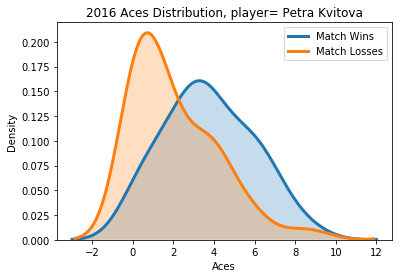

In [57]:
sns.distplot(kvitova2016['w_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(kvitova2016['l_ace'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Aces Distribution, player= Petra Kvitova')
plt.xlabel('Aces')
plt.ylabel('Density')
plt.show()

Kviotva's threshold number of aces diverged from the generalized player. Where the generalized women's tennis player serving 2 aces is more likely to win a match, Kvitova is only equally as likely to win or lose a match when serving 2 aces. Kvitova is increasingly likely to win a match if she serves between 4 and 8 aces. This higher number aces required to win a match suggests that Kvitova relies more on her serve to win matches. As a player who is taller than Svitolina, she likely has a better serve, has a higher power quotient and hits more aces. Where a player of Kvitova's height relies less on court coverage, her serve will give her easy points, both with aces and unreturned serves. Because aces are a proxy for serve speed and placement, if Kvitova is serving a lot of aces, she will be placing her serve better and getting good speed on her serve, which will help her protect her service games.

### Lourdes Domínguez Lino
![](former-top-40-player-lourdes-dominguez-lino-retires-from-tennis.jpg)
By 2016,Lourdes Domínguez Lino was in her last year on tour, announcing a retirement date for November. The 35 year old celebrated her 20th year on tour as her last. The Spaniard is the shortest of the three sample players, standing only 163 centimeters tall. By the time of her last match of the year at the French Open, Domínguez Lino was ranked outside the top 100 at  world number 112. Her season highlights included her reaching two round of 16s at the WTA International events in Charleston and Bogota.

Text(0.5, 1.0, 'Wins by surface, player= Lourdes Domínguez Lino')

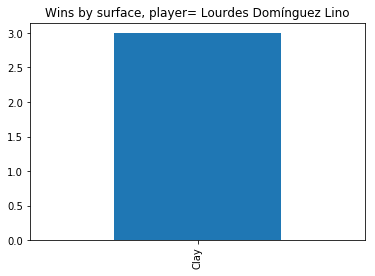

In [64]:
w_dominguezlino['surface'].value_counts().plot.bar()
plt.title('Wins by surface, player= Lourdes Domínguez Lino')

In her last year, Domínguez Lino could clearly be classified as a clay court specialist; her three match wins of the year all came on clay. With a 0% win rate on hard and grass courts, Domínguez Lino mustered a 42.8% win rate on clay. Domínguez Lino's low overall win rate translated into a low overall ranking. As discussed in the age distribution, it is rare to find old and unsuccessful players in tennis as they choose to simply retire. By the end of this year, the former top 40 player had made exactly that choice.

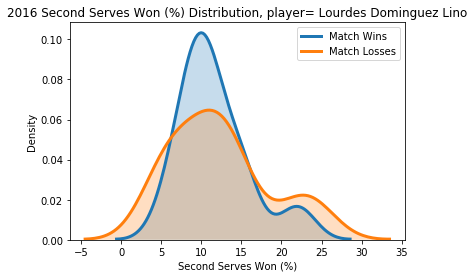

In [91]:
sns.distplot(dominguezlino2016['w_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Wins")
sns.distplot(dominguezlino2016['l_2ndWon'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, 
                  label = "Match Losses")
plt.title('2016 Second Serves Won (%) Distribution, player= Lourdes Dominguez Lino')
plt.xlabel('Second Serves Won (%)')
plt.ylabel('Density')
plt.show()

Domínguez Lino's diversion from the general player could be due to the low sample size of match wins that she had. Nevertheless, the trend was interesting to look at. In the matches that Domínguez Lino won, she hovered between 5% and 15% of points won when she served a second serve. It is unsurprising that she lost if she put in less than that percentage, but what is surprising is that she was more likely to lose if she put in more than 15% of her second serves. Because Domínguez Lino only won three matches, you can see that the small peak between 20-25% of second serves put in play is one of the three clay court matches she won. Because she lost more matches when she reached that threshold, even if she performs that well on her second serve she is still likely to lose. This probably has little to do with Domínguez Lino's serve and more to do with how much see struggled during her final season.

## Conclusion
___How well can this analysis be extrapolated outside of the 2016 WTA season?___

The answer to this question is fair but nevertheless irritating: _"it depends."_

Take player age for example, in 2016 it seemed that players between 30 and 35 years old had a certain level of success. But can there be causality in this trend? Is there a group of players in this age range that increases the perceived likelihood of success, or does being a player from 30-35 lead you to be more successful than you were as a 20-24 year old. It seems more likely that as successful generations move through certain age groups, it is perceived that being in that age group is your prime. In general, the physical traits used as evidence in the first part of this article are irrelevant to how a player can prepare for their matches and can only be examined by pundits to help with predictability.

As for match statistics, while looking at the general player is somewhat helpful, that player will change as people are added to the WTA tour, and as people retire from the tour. When examining individual pundits, it is more likely that tennis players and pundits alike will benefit from looking at individual player's match statistics to determine whether or not they can predict success in a given match. This is because of the reality that players play tennis differently. While Svitolina is worse than the average server and needs to save more break points to win matches, Kvitova relies on her serve and needs to serve around 5 aces to confidently be able to win a given matches. ANother reason is because player's opponents play differently.Where Kvitova holds more service games and you need to protect your serve when playing her, Svitolina does not hold as many service games and provides you leeway if you drop your serve (that is, unless she is saving a lot of the break points she faces). 

No one threshold can determine if a player will win a given match, and no one player plays the same way across each of their matches. To conclude, the search to find stable metrics to predict matches proves tough, not because of the ability to measure each of the metrics, but because both the player and their opponent's performance level are moving targets.